In [26]:
import numpy as np
import matplotlib.pyplot as plt
import yt
import proj_paths
import unyt as u
import os
import matplotlib

In [4]:
ds = yt.load(proj_paths.SNAP49_PATH)

yt : [INFO     ] 2023-12-05 22:19:09,144 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2023-12-05 22:19:09,145 ComovingIntegrationOn != 1 or (not found and OmegaLambda is 0.0), so we are turning off Cosmology.
yt : [INFO     ] 2023-12-05 22:19:09,146 Assuming length units are in kpc (physical)
yt : [INFO     ] 2023-12-05 22:19:09,193 Parameters: current_time              = 2.44999997317791
yt : [INFO     ] 2023-12-05 22:19:09,194 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2023-12-05 22:19:09,195 Parameters: domain_left_edge          = None
yt : [INFO     ] 2023-12-05 22:19:09,196 Parameters: domain_right_edge         = None
yt : [INFO     ] 2023-12-05 22:19:09,196 Parameters: cosmological_simulation   = False


In [40]:
width = 100 * u.kpc
resolution = [1000, 400, 100, 50]

In [41]:
kSZ_different_res = []
for res in resolution:
    proj = ds.proj(('gas', 'sz_kinetic'),"y")
    frb = proj.to_frb(width, resolution=res, center=(0,0,0))
    ksz = np.array(frb["gas", "sz_kinetic"]) 
    ksz_mu_K = ksz.T * u.Tcmb.v * 1e6
    kSZ_different_res.append(ksz_mu_K)

yt : [INFO     ] 2023-12-05 23:11:08,347 Making a fixed resolution buffer of (('gas', 'sz_kinetic')) 1000 by 1000
yt : [INFO     ] 2023-12-05 23:14:12,021 Making a fixed resolution buffer of (('gas', 'sz_kinetic')) 400 by 400
yt : [INFO     ] 2023-12-05 23:15:00,572 Making a fixed resolution buffer of (('gas', 'sz_kinetic')) 100 by 100
yt : [INFO     ] 2023-12-05 23:15:30,222 Making a fixed resolution buffer of (('gas', 'sz_kinetic')) 50 by 50


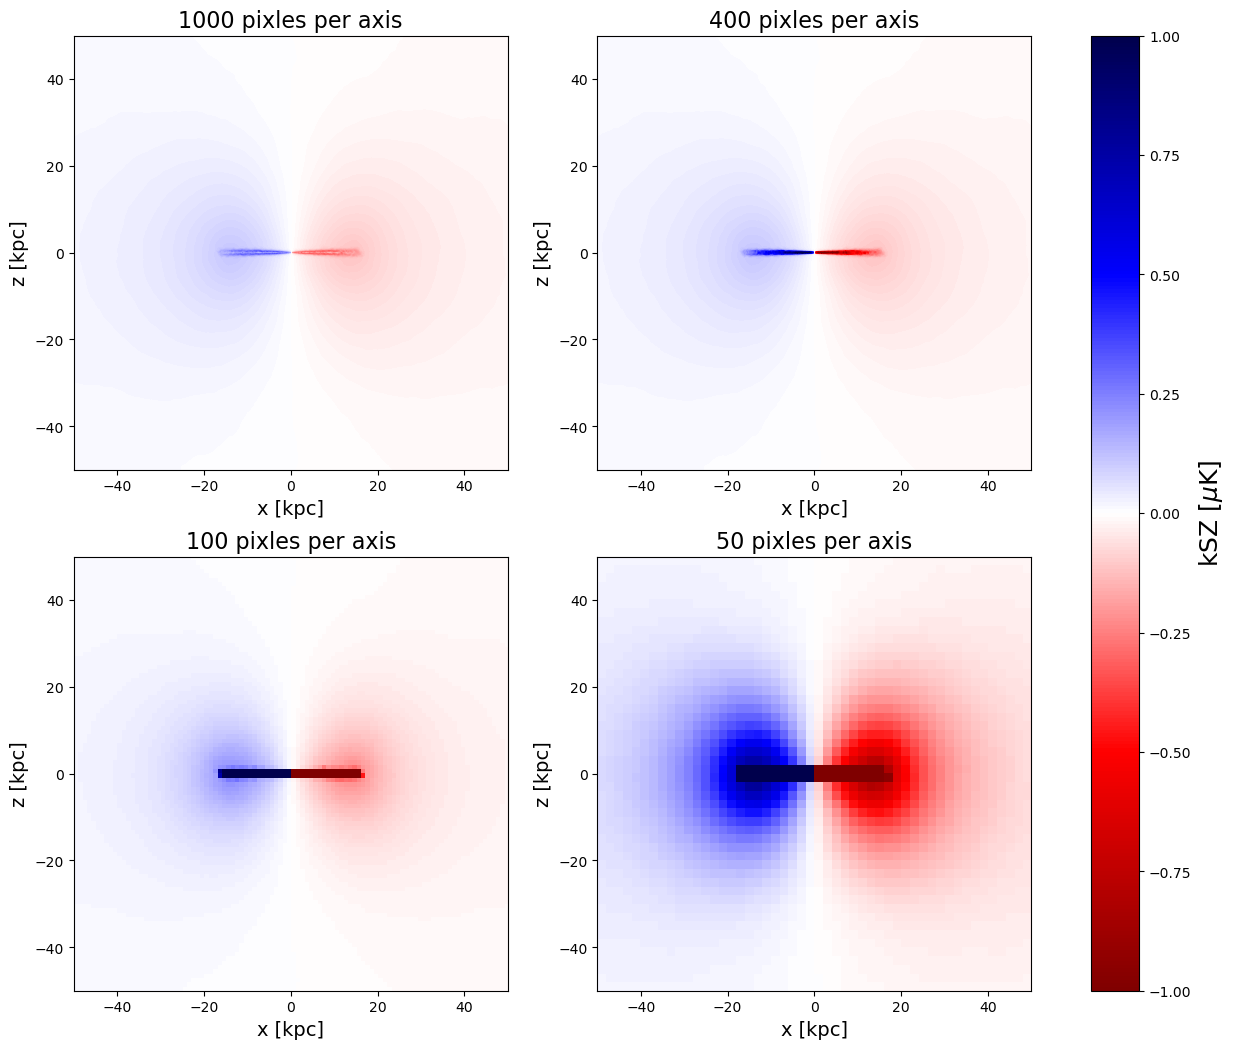

In [77]:
rows = 2
cols = 2
fig, axes = plt.subplots(rows, cols)
fig.subplots_adjust(right=2, top=2.1)

for i in range(rows):
    for j in range(cols):
        n = 2 * i + j
        title = str(resolution[n]) + " pixles per axis"
        axes[i,j].set_title(title, size=16)
        axes[i,j].set_xlabel("x [kpc]", size=14)
        axes[i,j].set_ylabel("z [kpc]", size=14)
        im = axes[i,j].imshow(kSZ_different_res[n],cmap='seismic_r', extent=[-width/2, width/2, -width/2, width/2], norm=matplotlib.colors.Normalize(vmin=-1,vmax=1))

cb = fig.colorbar(im1, ax=axes)
cb.set_label(label="kSZ [$\mu$K]", size=18)

fig.savefig("resolution_differences_yt.png", bbox_inches="tight")